In [11]:
from keras.datasets import imdb

using num_words = 10000 will increase the performance

In [12]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 2500)

For train_labels and test_labels the 0 stands for negative review and 1 stands for positive review

In [13]:
def decode_review_to_English(index):
    word_index = imdb.get_word_index()
    reserve_word_index = dict(
        [(value,key) for (key,value) in word_index.items()])
    decoded_review = ' '.join(
        [reserve_word_index.get(i-3,'?') for i in train_data[index]])
    return decoded_review

In [14]:
print(decode_review_to_English(547))

? with all thats going on in the world sometimes we need an escape ? ? is just that not a ? plot or deep meaning however it is not ? of substance there is more than ? action or heart ? ? there are the charming little shows you can watch with your kids and have enough substance to enjoy with your date try it you may like it more than you think the little girl is really smart and cute the dad and the girl go ? some ? ? when a ? boyfriend ? in trouble ? for ? and the life ? known may be ? ? fred ? and kelly lynch play good roles as the ? ? and ? ? and james ? are a interesting ? like ? portraying street wise ? ? their ? ? and comedy ?


In [15]:
import numpy as np

In [16]:
def vectorize_sequences(sequences,dimension=2500):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results     

In [17]:
x_train = vectorize_sequences(train_data)

In [8]:
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')

In [11]:
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers

In [13]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(2500,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

------configuring the optimizer and using custom losses and metrics------

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
               loss=losses.binary_crossentropy,
               metrices=['metrices.binary_accuracy'])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,
                    validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 339us/step - loss: 0.5327 - acc: 0.7608 - val_loss: 0.4201 - val_acc: 0.8340
Epoch 2/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.3547 - acc: 0.8684 - val_loss: 0.3351 - val_acc: 0.8687
Epoch 3/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.2883 - acc: 0.8891 - val_loss: 0.3364 - val_acc: 0.8559
Epoch 4/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.2578 - acc: 0.9001 - val_loss: 0.3005 - val_acc: 0.8763
Epoch 5/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.2379 - acc: 0.9067 - val_loss: 0.3002 - val_acc: 0.8761
Epoch 6/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.2239 - acc: 0.9131 - val_loss: 0.3125 - val_acc: 0.8730
Epoch 7/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.2151 - acc: 0.9150 - val_loss: 0.3084 - val_ac

Ploting the training and Validation loss

In [17]:
import matplotlib.pyplot as plt

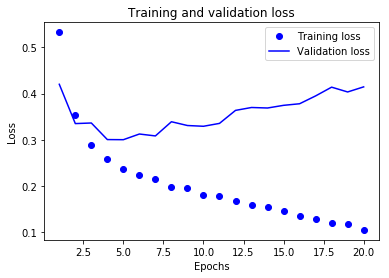

In [18]:
history_dict = history.history
history_dict.keys()
[u'acc',u'loss',u'val_acc',u'val_loss']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

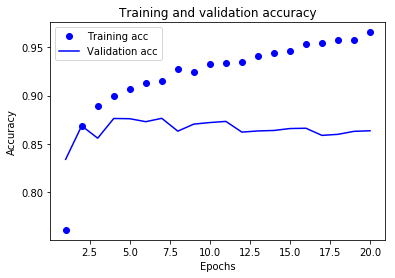

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

retraining

In [20]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(2500,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 8s 306us/step - loss: 0.4978 - acc: 0.7944
Epoch 2/4
25000/25000 [==============================] - 1s 37us/step - loss: 0.3172 - acc: 0.8814
Epoch 3/4
25000/25000 [==============================] - 1s 37us/step - loss: 0.2704 - acc: 0.8937
Epoch 4/4
25000/25000 [==============================] - 1s 51us/step


In [21]:
results

[0.30563030299186705, 0.87172]

In [23]:
model.predict(x_test)

array([[0.17285207],
       [0.998798  ],
       [0.59222275],
       ...,
       [0.07864983],
       [0.06077653],
       [0.54066736]], dtype=float32)

In [1]:
#applying regularization on this model to prevent overfiting
#original model
#from keras import models
#from keras import layers
#model = models.Sequential()
#model.add(layers.Dense(16,activation='relu',input_shape=(2500,)))
#model.add(layers.Dense(16,activation='relu'))
#model.add(layers.Dense(1,activation='sigmoid'))

The general workflow to find an appropriate model
size is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(4,activation='relu',input_shape=(2500,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
          